# Лабораторная работа №2

ФИО:   
Группа:

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 1. Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Загрузка данных
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/sample_data/students_adaptability_level_online_education.csv')
print(f"Размер датасета: {data.shape}")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Размер датасета: (1205, 14)


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


## 2. Описание постановки задачи

**Название датасета:** Students Adaptability Level in Online Education

**Постановка задачи:**
Необходимо предсказать уровень адаптивности студентов к онлайн-образованию на основе различных характеристик: демографических данных, условий обучения, технических возможностей и других факторов.

**Переменные в датасете:**
- **Признаки (X):** Gender, Age, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device
- **Целевая переменная (y):** Adaptivity Level

**Тип задачи:** Классификация (дискретная целевая переменная)
- Целевая переменная является **дискретной** - предсказываем класс из конечного множества вариантов (Low, Moderate, High)

## 3. Распределение целевой переменной

Количество уникальных значений целевой переменной: 3

Распределение значений:
Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64

Процентное распределение:
Adaptivity Level
Moderate    51.867220
Low         39.834025
High         8.298755
Name: proportion, dtype: float64


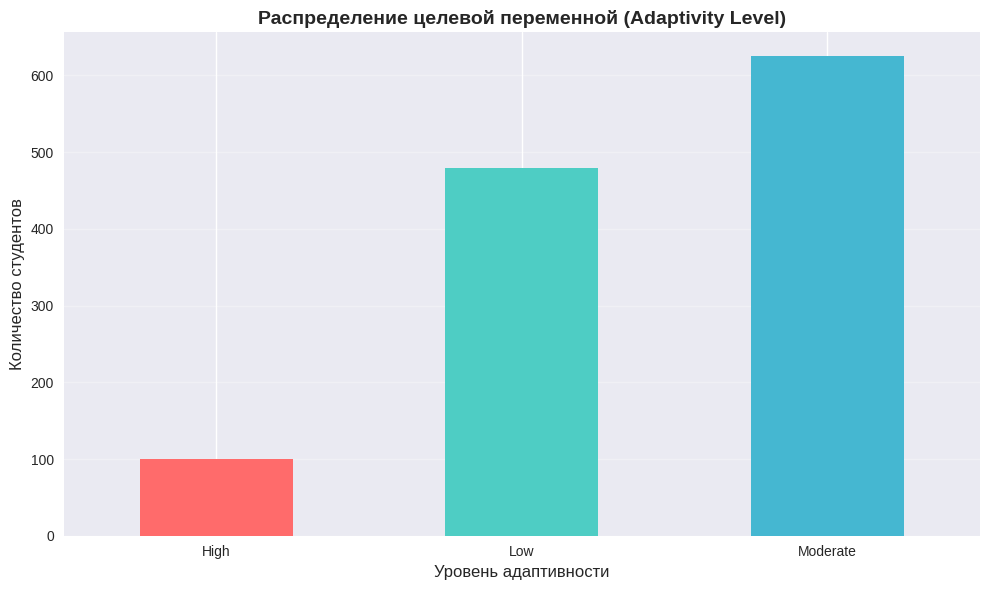


ВЫВОДЫ:
1. Целевая переменная имеет 3 уникальных значения
2. Распределение классов:
   - Moderate: 625 (51.9%)
   - Low: 480 (39.8%)
   - High: 100 (8.3%)

3. Соотношение максимального и минимального класса: 6.25
   ⚠️ Обнаружен дисбаланс классов!


In [ ]:
# количество уникальных значений целевой переменной
X = data.drop('Adaptivity Level', axis=1)
y = data['Adaptivity Level']
unique_count = y.nunique()
print(f"Количество уникальных значений целевой переменной: {unique_count}")
print(f"\nРаспределение значений:")
print(y.value_counts())
print(f"\nПроцентное распределение:")
print(y.value_counts(normalize=True) * 100)

# гистограмма
plt.figure(figsize=(10, 6))
y.value_counts().sort_index().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Распределение целевой переменной (Adaptivity Level)', fontsize=14, fontweight='bold')
plt.xlabel('Уровень адаптивности', fontsize=12)
plt.ylabel('Количество студентов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод
print("\n" + "="*50)
print("ВЫВОДЫ:")
print("="*50)
print(f"1. Целевая переменная имеет {unique_count} уникальных значения")
print("2. Распределение классов:")
for val, count in y.value_counts().items():
    pct = (count / len(y)) * 100
    print(f"   - {val}: {count} ({pct:.1f}%)")

# дисбаланс
max_class = y.value_counts().max()
min_class = y.value_counts().min()
imbalance_ratio = max_class / min_class
print(f"\n3. Соотношение максимального и минимального класса: {imbalance_ratio:.2f}")
if imbalance_ratio > 2:
    print("   ⚠️ Обнаружен дисбаланс классов!")
else:
    print("   ✓ Распределение относительно сбалансировано")


## 4. Основные статистики по переменным


In [ ]:
# Основные статистики (describe() работает только для числовых признаков)
# В данном датасете все признаки категориальные, поэтому посмотрим на описательные статистики
print("Описательные статистики для категориальных признаков:")
print("="*60)
for col in X.columns:
    print(f"\n{col}:")
    print(X[col].value_counts())
    print(f"Уникальных значений: {X[col].nunique()}")

# Для числовых признаков (если бы они были) использовали бы:
# data.describe()


Описательные статистики для категориальных признаков:

Gender:
Gender
Boy     663
Girl    542
Name: count, dtype: int64
Уникальных значений: 2

Age:
Age
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: count, dtype: int64
Уникальных значений: 6

Education Level:
Education Level
School        530
University    456
College       219
Name: count, dtype: int64
Уникальных значений: 3

Institution Type:
Institution Type
Non Government    823
Government        382
Name: count, dtype: int64
Уникальных значений: 2

IT Student:
IT Student
No     901
Yes    304
Name: count, dtype: int64
Уникальных значений: 2

Location:
Location
Yes    935
No     270
Name: count, dtype: int64
Уникальных значений: 2

Load-shedding:
Load-shedding
Low     1004
High     201
Name: count, dtype: int64
Уникальных значений: 2

Financial Condition:
Financial Condition
Mid     878
Poor    242
Rich     85
Name: count, dtype: int64
Уникальных значений: 3

Internet Type:
Internet Type
Mobile

## 5. Основная информация по датасету


In [ ]:
# Основная информация о датасете
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


## 6. Анализ пропущенных значений


In [ ]:
# Подсчет пропущенных значений
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Колонка': missing_values.index,
    'Количество пропусков': missing_values.values,
    'Процент пропусков': missing_percent.values
})

missing_df = missing_df[missing_df['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False)

if len(missing_df) > 0:
    print("Пропущенные значения:")
    print(missing_df.to_string(index=False))
else:
    print("✓ Пропущенных значений не обнаружено!")
    print("\nПроверка всех возможных вариантов пропусков:")
    print(f"NaN: {data.isna().sum().sum()}")
    print(f"Null (строки): {data.isnull().sum().sum()}")
    print(f"None: {(data == None).sum().sum()}")
    print(f"Пустые строки: {(data == '').sum().sum()}")


if len(missing_df) == 0:
    print("В датасете отсутствуют пропущенные значения.")
else:
    print("Обнаружены пропуски в следующих колонках:")
    for idx, row in missing_df.iterrows():
        print(f"\n{row['Колонка']}: {row['Количество пропусков']} ({row['Процент пропусков']:.2f}%)")


✓ Пропущенных значений не обнаружено!

Проверка всех возможных вариантов пропусков:
NaN: 0
Null (строки): 0
None: 0
Пустые строки: 0
В датасете отсутствуют пропущенные значения.


## 7. Гистограммы признаков


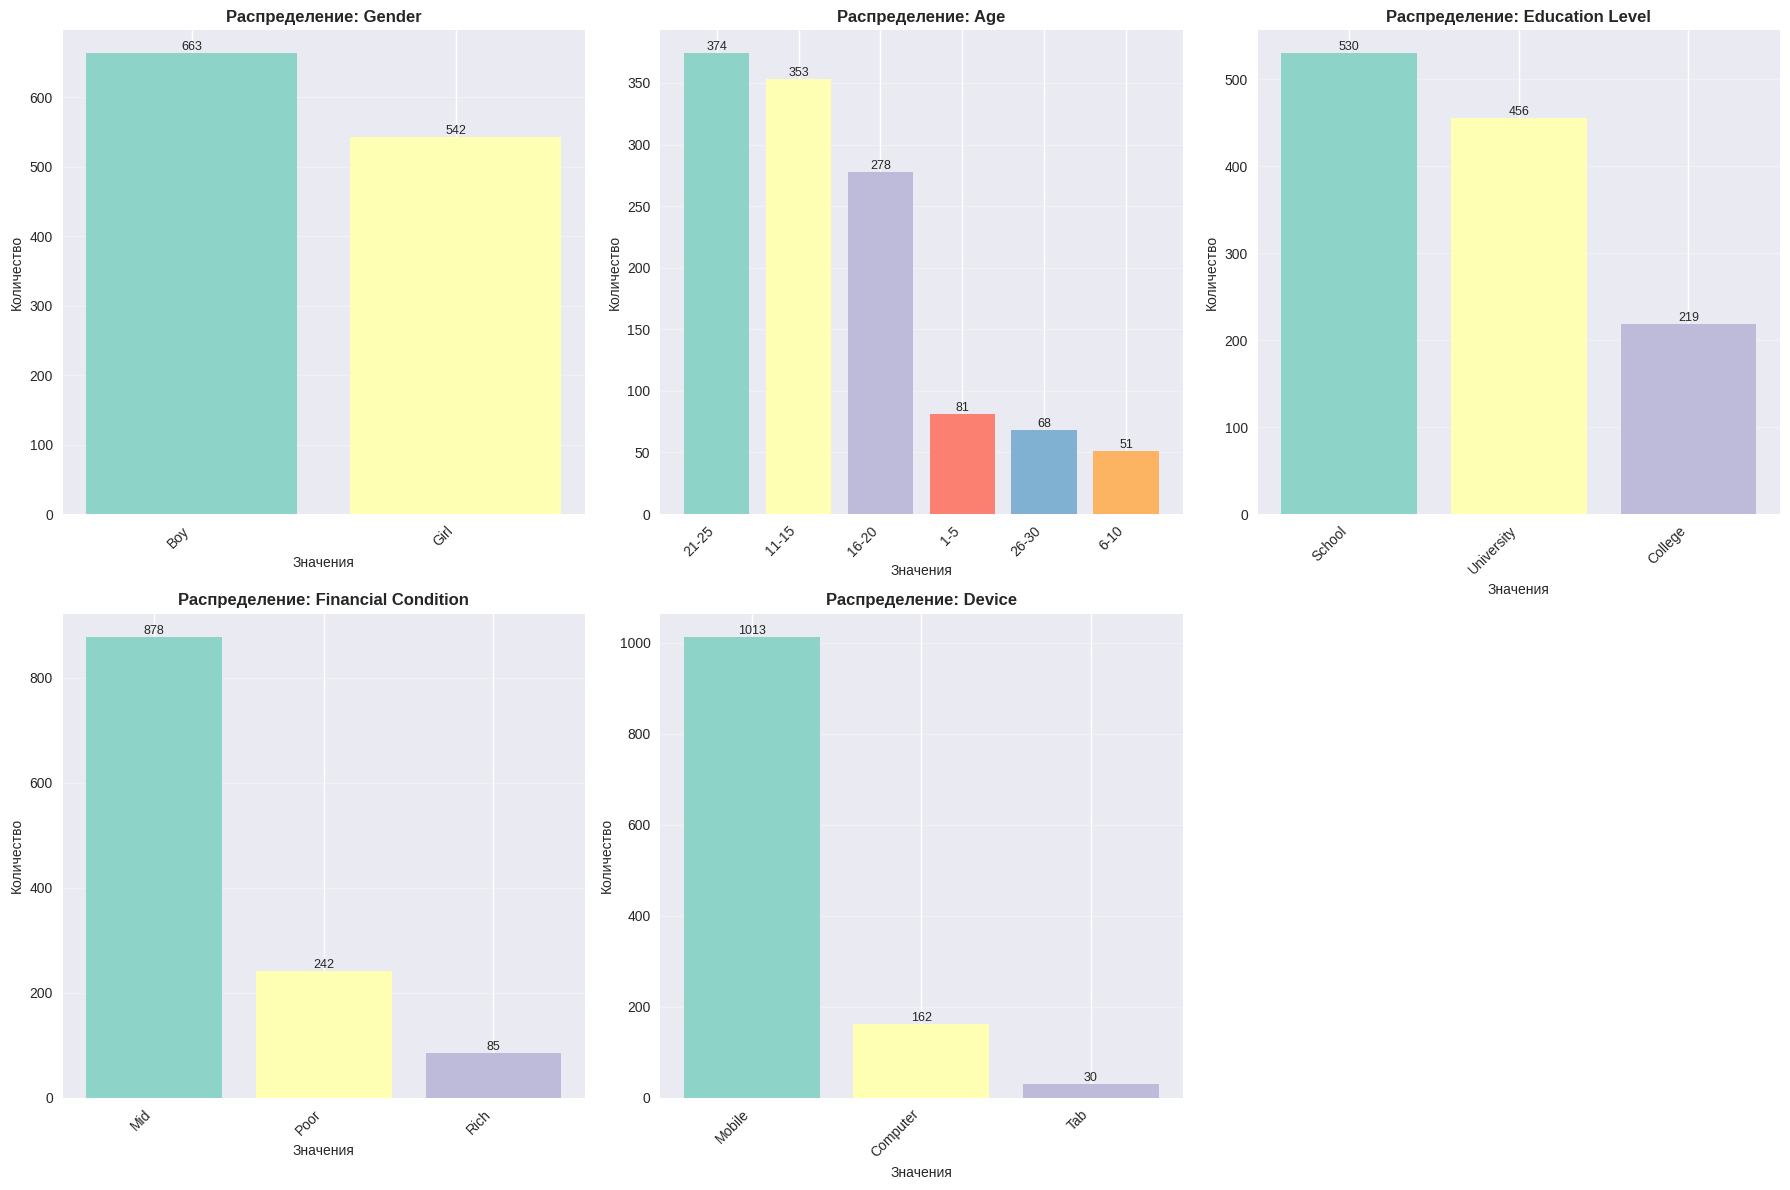

АНАЛИЗ РАСПРЕДЕЛЕНИЙ ПРИЗНАКОВ:

Gender:
  Уникальных значений: 2
  Наиболее частое значение: Boy (663 раз, 55.0%)
  ✓ Распределение относительно равномерное

Age:
  Уникальных значений: 6
  Наиболее частое значение: 21-25 (374 раз, 31.0%)
  ⚠️ Обнаружено сильное смещение (соотношение 7.33)

Education Level:
  Уникальных значений: 3
  Наиболее частое значение: School (530 раз, 44.0%)
  ⚠️ Обнаружено умеренное смещение (соотношение 2.42)

Financial Condition:
  Уникальных значений: 3
  Наиболее частое значение: Mid (878 раз, 72.9%)
  ⚠️ Обнаружено сильное смещение (соотношение 10.33)

Device:
  Уникальных значений: 3
  Наиболее частое значение: Mobile (1013 раз, 84.1%)
  ⚠️ Обнаружено сильное смещение (соотношение 33.77)


In [ ]:
# Выберем 5 признаков для анализа
selected_features = ['Gender', 'Age', 'Education Level', 'Financial Condition', 'Device']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    value_counts = X[feature].value_counts()
    axes[i].bar(range(len(value_counts)), value_counts.values, color=plt.cm.Set3(range(len(value_counts))))
    axes[i].set_title(f'Распределение: {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Значения', fontsize=10)
    axes[i].set_ylabel('Количество', fontsize=10)
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[i].grid(axis='y', alpha=0.3)

    # Добавим значения на столбцы
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v, str(v), ha='center', va='bottom', fontsize=9)

# Удалим лишний subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Анализ распределений
print("АНАЛИЗ РАСПРЕДЕЛЕНИЙ ПРИЗНАКОВ:")
print("="*60)
for feature in selected_features:
    print(f"\n{feature}:")
    value_counts = X[feature].value_counts()
    print(f"  Уникальных значений: {X[feature].nunique()}")
    print(f"  Наиболее частое значение: {value_counts.index[0]} ({value_counts.iloc[0]} раз, {(value_counts.iloc[0]/len(X)*100):.1f}%)")

    # Проверка на смещение
    max_val = value_counts.max()
    min_val = value_counts.min()
    ratio = max_val / min_val
    if ratio > 3:
        print(f"  ⚠️ Обнаружено сильное смещение (соотношение {ratio:.2f})")
    elif ratio > 2:
        print(f"  ⚠️ Обнаружено умеренное смещение (соотношение {ratio:.2f})")
    else:
        print(f"  ✓ Распределение относительно равномерное")


## 8. Зависимость признаков от целевой переменной


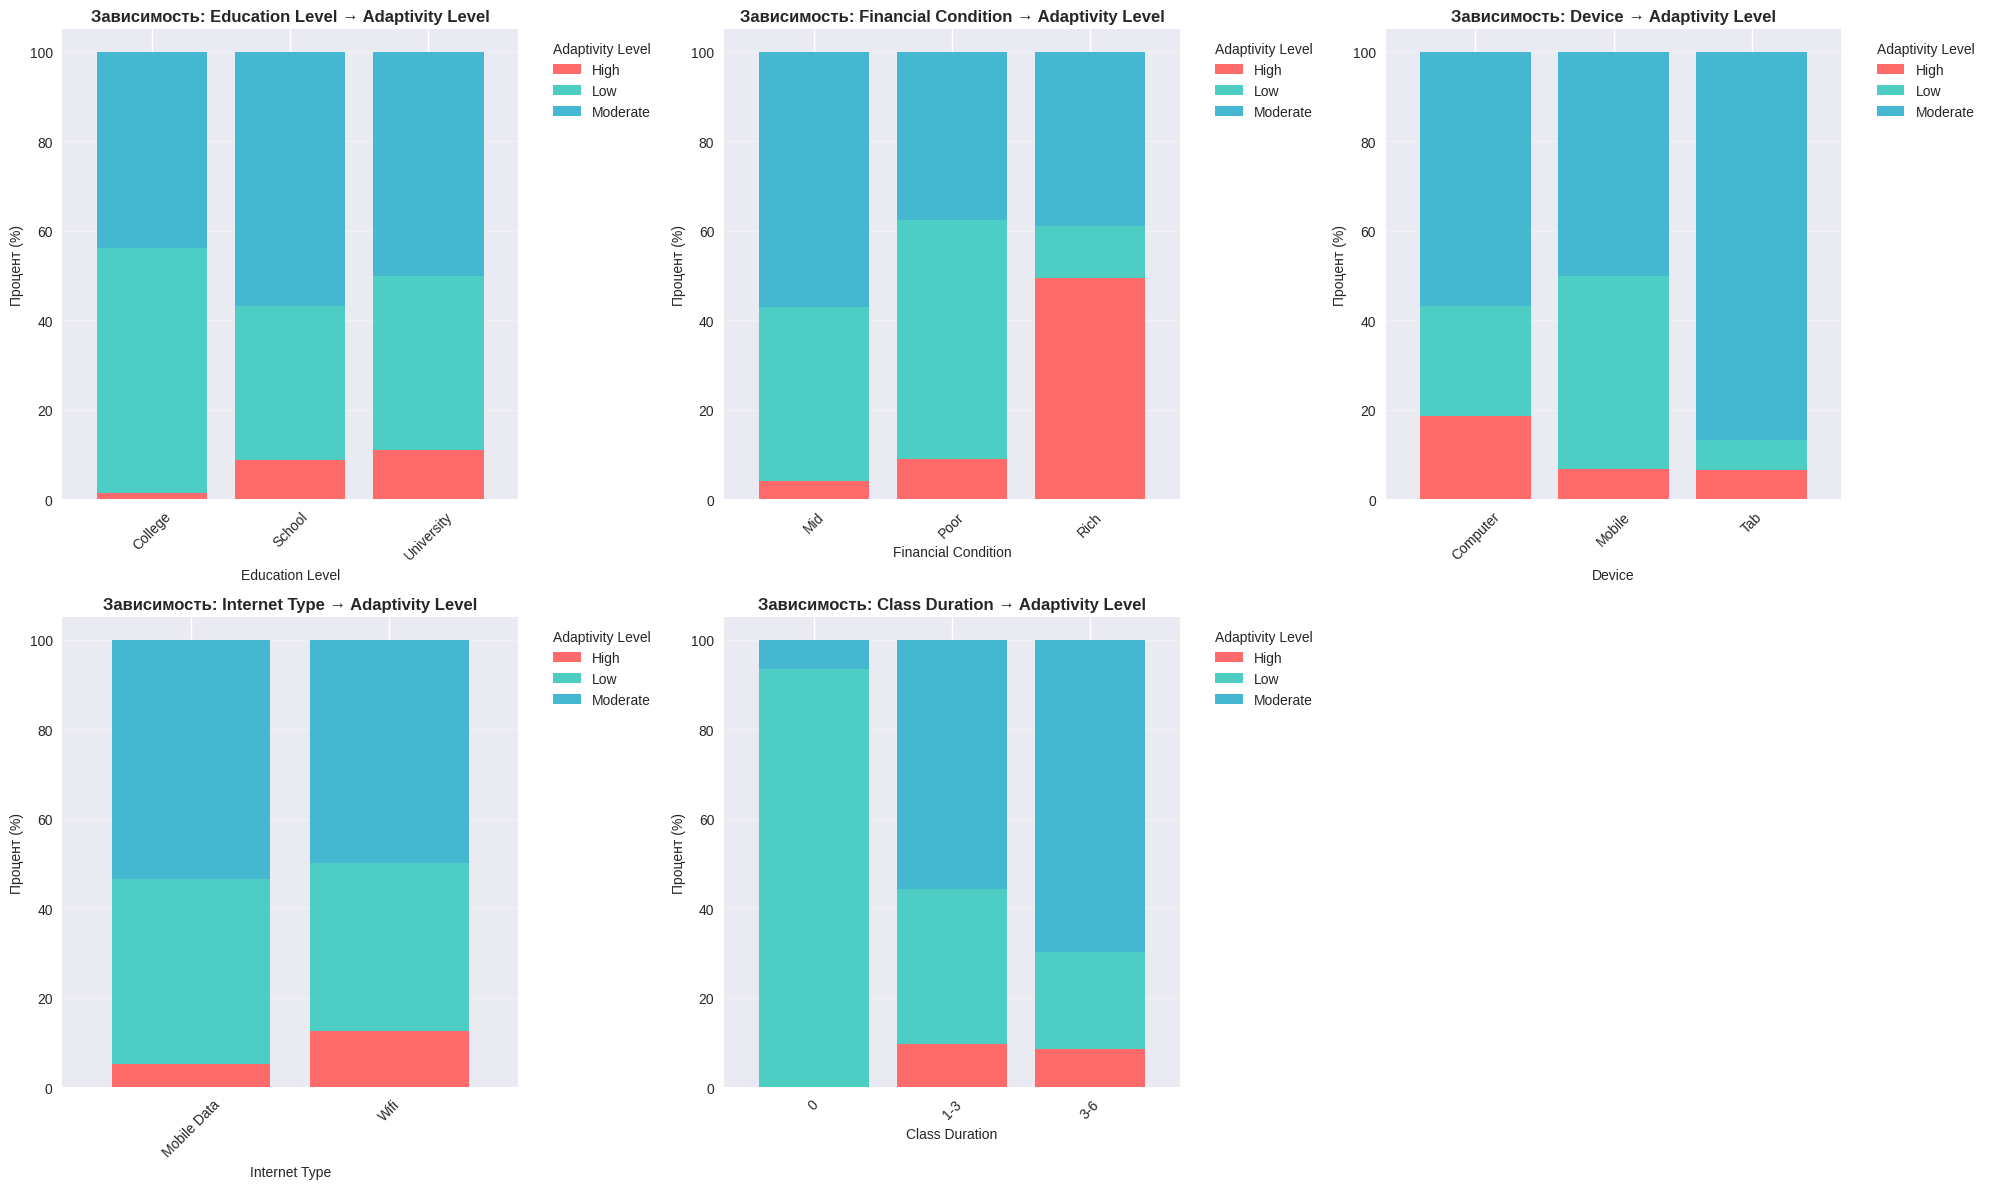

АНАЛИЗ ВЗАИМОСВЯЗЕЙ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:

Education Level:
Adaptivity Level  High  Low  Moderate
Education Level                      
College              3  120        96
School              47  182       301
University          50  178       228
  Максимальная разница в пропорциях: 0.55
  ✓ Признак имеет сильную взаимосвязь с целевой переменной
    Можно использовать для прогнозирования

Financial Condition:
Adaptivity Level     High  Low  Moderate
Financial Condition                     
Mid                    36  341       501
Poor                   22  129        91
Rich                   42   10        33
  Максимальная разница в пропорциях: 0.53
  ✓ Признак имеет сильную взаимосвязь с целевой переменной
    Можно использовать для прогнозирования

Device:
Adaptivity Level  High  Low  Moderate
Device                               
Computer            30   40        92
Mobile              68  438       507
Tab                  2    2        26
  Максимальная разница в пропорциях:

In [ ]:
features_for_target = ['Education Level', 'Financial Condition', 'Device', 'Internet Type', 'Class Duration']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features_for_target):
    crosstab = pd.crosstab(X[feature], y, normalize='index') * 100

    crosstab.plot(kind='bar', ax=axes[i], stacked=True,
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1'], width=0.8)
    axes[i].set_title(f'Зависимость: {feature} → Adaptivity Level',
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Процент (%)', fontsize=10)
    axes[i].legend(title='Adaptivity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("АНАЛИЗ ВЗАИМОСВЯЗЕЙ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
print("="*60)

for feature in features_for_target:
    print(f"\n{feature}:")
    crosstab = pd.crosstab(X[feature], y)
    print(crosstab)


    proportions = pd.crosstab(X[feature], y, normalize='index')
    max_diff = proportions.max(axis=1).max() - proportions.min(axis=1).min()

    print(f"  Максимальная разница в пропорциях: {max_diff:.2f}")
    if max_diff > 0.3:
        print(f"  ✓ Признак имеет сильную взаимосвязь с целевой переменной")
        print(f"    Можно использовать для прогнозирования")
    elif max_diff > 0.15:
        print(f"  ⚠️ Признак имеет умеренную взаимосвязь с целевой переменной")
        print(f"    Может быть полезен в комбинации с другими признаками")
    else:
        print(f"  ✗ Признак имеет слабую взаимосвязь с целевой переменной")
        print(f"    Возможно, не очень полезен для прогнозирования")
